In [63]:
import pandas as pd

#### Get data and read from URL

In [2]:
url= "https://raw.githubusercontent.com/sathya-explr/pandas-code-challenges-3017222/main/data/auto_mpg.csv"
# In the raw file we have comma seperted data, and header column is neumeral

In [3]:
df = pd.read_csv(url,header=0)
# no need of sep parameter
# here you can include the columns as names= [list]

In [4]:
df.head()

,0,1,2,3,4,5,6,7
0,18.0,8,307.0,130.0,3504.0,12.0,70,India
1,15.0,8,350.0,165.0,3693.0,11.5,70,India
2,18.0,8,318.0,150.0,3436.0,11.0,70,India
3,16.0,8,304.0,150.0,3433.0,12.0,70,India
4,17.0,8,302.0,140.0,3449.0,10.5,70,India


In [5]:
# replacing column headers with names
df.columns = ['MPG','Cylinders','Displacement','Horsepower','Weight','Acceleration','Model Year','Origin']

In [6]:
df.head(10)

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Origin
0,18.0,8,307.0,130.0,3504.0,12.0,70,India
1,15.0,8,350.0,165.0,3693.0,11.5,70,India
2,18.0,8,318.0,150.0,3436.0,11.0,70,India
3,16.0,8,304.0,150.0,3433.0,12.0,70,India
4,17.0,8,302.0,140.0,3449.0,10.5,70,India
5,15.0,8,429.0,198.0,4341.0,10.0,70,India
6,14.0,8,454.0,220.0,4354.0,9.0,70,India
7,14.0,8,440.0,215.0,4312.0,8.5,70,India
8,14.0,8,455.0,225.0,4425.0,10.0,70,India
9,15.0,8,390.0,190.0,3850.0,8.5,70,India


[Refer here for more info on renaming columns](https://symbiosisacademy.org/tutorial-index/pandas-read_csv-header/#:~:text=Pandas%20read_csv%20%28%29%20function%20automatically%20parses%20the%20header,this%20default%20behavior%20to%20customize%20the%20column%20names.)

In [7]:
# to get info on columns
df.info()

# one advantage with info : you get column nos, useful while slicing.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   MPG           398 non-null    float64
 1   Cylinders     398 non-null    int64  
 2   Displacement  398 non-null    float64
 3   Horsepower    392 non-null    float64
 4   Weight        398 non-null    float64
 5   Acceleration  398 non-null    float64
 6   Model Year    398 non-null    int64  
 7   Origin        398 non-null    object 
dtypes: float64(5), int64(2), object(1)
memory usage: 25.0+ KB


In [6]:
df.columns

# use list(df.columns) to get column names in a list

Index(['MPG', 'Cylinders', 'Displacement', 'Horsepower', 'Weight',
       'Acceleration', 'Model Year', 'Origin'],
      dtype='object')

#### Describe method
- It gives statistical summary of numerical data
- for categorical data, with object(string) values you need include parameter
- df.describe(include=object)

In [7]:
df.describe()

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year
count,398.000000,398.000000,398.000000,392.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,104.469388,2970.424623,15.568090,76.010050
std,7.815984,1.701004,104.269838,38.491160,846.841774,2.757689,3.697627
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000
25%,17.500000,4.000000,104.250000,75.000000,2223.750000,13.825000,73.000000
50%,23.000000,4.000000,148.500000,93.500000,2803.500000,15.500000,76.000000
75%,29.000000,8.000000,262.000000,126.000000,3608.000000,17.175000,79.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000


In [8]:
df.describe(include=object)

,Origin
count,398
unique,3
top,India
freq,249


To know the 3 unique values, use df[column_name].value_counts()

In [10]:
df['Origin'].value_counts()

India      249
Germany     79
USA         70
Name: Origin, dtype: int64

<AxesSubplot:>

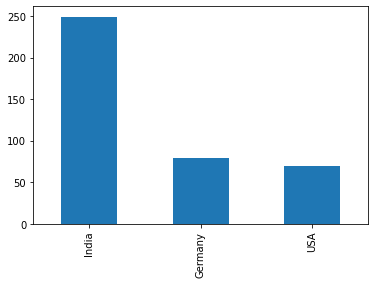

In [11]:
# visualizing the above in a graph
df['Origin'].value_counts().plot(kind='bar')

#### Creating new columns

In [13]:
df['wt_per_cylinder'] = df['Weight']/df['Cylinders']

In [14]:
df['acc/power'] = df['Acceleration']/df['Horsepower']

In [15]:
df.head()
# another column is displacement power ratio .
# it is displcement/horsepower

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Origin,wt_per_cylinder,acc/power
0,18.0,8,307.0,130.0,3504.0,12.0,70,India,438.000,0.092308
1,15.0,8,350.0,165.0,3693.0,11.5,70,India,461.625,0.069697
2,18.0,8,318.0,150.0,3436.0,11.0,70,India,429.500,0.073333
3,16.0,8,304.0,150.0,3433.0,12.0,70,India,429.125,0.080000
4,17.0,8,302.0,140.0,3449.0,10.5,70,India,431.125,0.075000


#### Data Slicing & Filtering
- use loc and iloc
- loc we can specify column names, after row selection
- loc - no need to reduce numbers whereas in iloc gives one less. 
- in iloc we can give step size, i..e we can fetch alternate values 
- ex: df.iloc[50:301:2] here we fetch alternate rows starting from 50 and ending 300
- negative indexing is possible with iloc
- to get last 4 rows and columns: df.iloc[-4:,-9:]

In [64]:
url2 = 'https://raw.githubusercontent.com/sathya-explr/pandas-code-challenges-3017222/main/data/marketing_campaign.csv'

In [65]:
df = pd.read_csv(url2,header=0,sep='\t')
# making the zeroth row as header and seperator as tab

In [66]:
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0


In [23]:
df.columns
# here use df.info() to get column number directly. 

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response'],
      dtype='object')

In [32]:
df.iloc[:,9:15]
# here we get column number of the required columns and filter it 

,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds
0,635,88,546,172,88,88
1,11,1,6,2,1,6
2,426,49,127,111,21,42
3,11,4,20,10,3,5
4,173,43,118,46,27,15
...,...,...,...,...,...,...
2235,709,43,182,42,118,247
2236,406,0,30,0,0,8
2237,908,48,217,32,12,24
2238,428,30,214,80,30,61


In [33]:
df[['MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases']]
# we get same result as above but we have to name the columns

,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases
0,635,88,546,172,88,88,3
1,11,1,6,2,1,6,2
2,426,49,127,111,21,42,1
3,11,4,20,10,3,5,2
4,173,43,118,46,27,15,5
...,...,...,...,...,...,...,...
2235,709,43,182,42,118,247,2
2236,406,0,30,0,0,8,7
2237,908,48,217,32,12,24,1
2238,428,30,214,80,30,61,2


In [37]:
df.loc[(df.ID ==7446)]
--gives 5 th row
# here we find rownumbers

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
5,7446,1967,Master,Together,62513.0,0,1,09-09-2013,16,520,...,6,0,0,0,0,0,0,3,11,0


In [38]:
df.loc[(df.ID ==2114)]

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
15,2114,1946,PhD,Single,82800.0,0,0,24-11-2012,23,1006,...,3,0,0,1,1,0,0,3,11,1


In [49]:
df.loc[5:15]
# you get row nums from 5 to 15
# # same result with iloc= df.iloc[5:16,:]
# in df.loc, you need not specify column data whereas in iloc it is necessary. 
#you can also filter columns here, df.loc[5:15,'MntWines':'MntGoldProds']


,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
5,7446,1967,Master,Together,62513.0,0,1,09-09-2013,16,520,...,6,0,0,0,0,0,0,3,11,0
6,965,1971,Graduation,Divorced,55635.0,0,1,13-11-2012,34,235,...,6,0,0,0,0,0,0,3,11,0
7,6177,1985,PhD,Married,33454.0,1,0,08-05-2013,32,76,...,8,0,0,0,0,0,0,3,11,0
8,4855,1974,PhD,Together,30351.0,1,0,06-06-2013,19,14,...,9,0,0,0,0,0,0,3,11,1
9,5899,1950,PhD,Together,5648.0,1,1,13-03-2014,68,28,...,20,1,0,0,0,0,0,3,11,0
10,1994,1983,Graduation,Married,NaN,1,0,15-11-2013,11,5,...,7,0,0,0,0,0,0,3,11,0
11,387,1976,Basic,Married,7500.0,0,0,13-11-2012,59,6,...,8,0,0,0,0,0,0,3,11,0
12,2125,1959,Graduation,Divorced,63033.0,0,0,15-11-2013,82,194,...,2,0,0,0,0,0,0,3,11,0
13,8180,1952,Master,Divorced,59354.0,1,1,15-11-2013,53,233,...,6,0,0,0,0,0,0,3,11,0
14,2569,1987,Graduation,Married,17323.0,0,0,10-10-2012,38,3,...,8,0,0,0,0,0,0,3,11,0


In [45]:
df.iloc[5:16,9:15]
# specifying row numbers and the amount columns

,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds
5,520,42,98,0,42,14
6,235,65,164,50,49,27
7,76,10,56,3,1,23
8,14,0,24,3,3,2
9,28,0,6,1,1,13
10,5,5,6,0,2,1
11,6,16,11,11,1,16
12,194,61,480,225,112,30
13,233,2,53,3,5,14
14,3,14,17,6,1,5


#### Method2
- here we make the id column as index
- then use loc to select the subset

In [46]:
df_subset = df.set_index('ID')

# to change the index in the original dataframe: df.set_index('ID', inplace=true)
# to reset the index and revert to df.reset_index(inplace=true)

In [48]:
df_subset.head(3)
# now we can directly use the id values in .loc[] method

,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
ID,,,,,,,,,,,,,,,,,,,,,
5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,88,...,7,0,0,0,0,0,0,3,11,1
2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,1,...,5,0,0,0,0,0,0,3,11,0
4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,49,...,4,0,0,0,0,0,0,3,11,0


In [50]:
df_subset.loc[7446:2114]
# in this method it is also possible to specify column names
# df.loc[5:15,'MntWines':'MntGoldProds'] without changing the index

,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
ID,,,,,,,,,,,,,,,,,,,,,
7446,1967,Master,Together,62513.0,0,1,09-09-2013,16,520,42,...,6,0,0,0,0,0,0,3,11,0
965,1971,Graduation,Divorced,55635.0,0,1,13-11-2012,34,235,65,...,6,0,0,0,0,0,0,3,11,0
6177,1985,PhD,Married,33454.0,1,0,08-05-2013,32,76,10,...,8,0,0,0,0,0,0,3,11,0
4855,1974,PhD,Together,30351.0,1,0,06-06-2013,19,14,0,...,9,0,0,0,0,0,0,3,11,1
5899,1950,PhD,Together,5648.0,1,1,13-03-2014,68,28,0,...,20,1,0,0,0,0,0,3,11,0
1994,1983,Graduation,Married,NaN,1,0,15-11-2013,11,5,5,...,7,0,0,0,0,0,0,3,11,0
387,1976,Basic,Married,7500.0,0,0,13-11-2012,59,6,16,...,8,0,0,0,0,0,0,3,11,0
2125,1959,Graduation,Divorced,63033.0,0,0,15-11-2013,82,194,61,...,2,0,0,0,0,0,0,3,11,0
8180,1952,Master,Divorced,59354.0,1,1,15-11-2013,53,233,2,...,6,0,0,0,0,0,0,3,11,0


In [51]:
# in this method it is also possible to specify column names
df.loc[5:15,'MntWines':'MntGoldProds']

,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds
5,520,42,98,0,42,14
6,235,65,164,50,49,27
7,76,10,56,3,1,23
8,14,0,24,3,3,2
9,28,0,6,1,1,13
10,5,5,6,0,2,1
11,6,16,11,11,1,16
12,194,61,480,225,112,30
13,233,2,53,3,5,14
14,3,14,17,6,1,5


In [61]:
df.iloc[50:301:2,-9:]
# this is for getting alternate rows and last 9 columns 

,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
50,0,0,0,0,0,0,3,11,0
52,0,0,0,0,0,0,3,11,0
54,0,0,0,0,0,0,3,11,0
56,0,0,0,0,0,0,3,11,1
58,0,0,0,0,0,0,3,11,0
...,...,...,...,...,...,...,...,...,...
292,0,0,1,0,0,0,3,11,0
294,0,0,0,0,0,0,3,11,0
296,0,0,0,0,0,0,3,11,0
298,0,0,0,0,0,0,3,11,0


#### Filtering using conditions
- use df.loc
- pass conditions inside it
- check the use of isin()
- negate isin()  for filtering
- use bit operators &, | while filtering
- creating new column while filtering
- Eg: df.loc[((df['NumWebPurchases'] > 5) | (df['NumDealsPurchases'] > 5)),'ActiveOnlineBuyers'] = 'Active'
- condition negating two ways:
- 1. df.loc[((df['NumWebPurchases'] <= 5) & (df['NumDealsPurchases'] <= 5))]
- 2. df.loc[~((df['NumWebPurchases'] > 5) | (df['NumDealsPurchases'] > 5))]


In [68]:
# getting married customers
df.loc[df['Marital_Status'] == 'Married']

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0
7,6177,1985,PhD,Married,33454.0,1,0,08-05-2013,32,76,...,8,0,0,0,0,0,0,3,11,0
10,1994,1983,Graduation,Married,NaN,1,0,15-11-2013,11,5,...,7,0,0,0,0,0,0,3,11,0
11,387,1976,Basic,Married,7500.0,0,0,13-11-2012,59,6,...,8,0,0,0,0,0,0,3,11,0
14,2569,1987,Graduation,Married,17323.0,0,0,10-10-2012,38,3,...,8,0,0,0,0,0,0,3,11,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2226,4478,1979,Graduation,Married,63777.0,1,1,24-03-2013,87,457,...,8,0,0,0,0,0,0,3,11,0
2229,10084,1972,Graduation,Married,24434.0,2,0,18-05-2014,9,3,...,7,0,0,0,0,0,0,3,11,0
2234,8372,1974,Graduation,Married,34421.0,1,0,01-07-2013,81,3,...,7,0,0,0,0,0,0,3,11,0
2235,10870,1967,Graduation,Married,61223.0,0,1,13-06-2013,46,709,...,5,0,0,0,0,0,0,3,11,0


In [72]:
# single and born after 1990
df.loc[(~df['Marital_Status'].isin(['Married','Together'])) & (df['Year_Birth']>1990)]
# use logical &

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
111,7431,1991,PhD,Single,68126.0,0,0,10-11-2012,40,1332,...,9,0,1,0,0,0,0,3,11,1
113,999,1991,Graduation,Single,86037.0,0,0,02-01-2013,95,490,...,3,0,1,1,0,0,0,3,11,1
140,821,1992,Master,Single,92859.0,0,0,19-10-2012,46,962,...,2,0,0,0,0,0,0,3,11,0
392,2669,1993,Graduation,Single,74293.0,0,0,04-05-2014,66,375,...,2,0,0,0,0,0,0,3,11,0
696,8315,1995,Graduation,Single,34824.0,0,0,26-03-2014,65,4,...,6,0,0,0,0,0,0,3,11,0
747,10548,1995,Graduation,Single,71163.0,0,0,09-03-2014,30,283,...,1,0,0,0,0,0,0,3,11,0
831,8560,1992,Graduation,Single,48789.0,0,0,10-09-2012,94,351,...,6,0,0,0,0,0,0,3,11,0
846,10343,1991,2n Cycle,Single,61618.0,0,0,29-09-2012,27,605,...,3,0,0,0,0,0,0,3,11,0
893,9960,1991,Basic,Single,26868.0,1,0,30-04-2014,52,0,...,7,0,0,0,0,0,0,3,11,0
914,10619,1994,Graduation,Single,95529.0,0,0,03-12-2012,29,770,...,3,0,0,1,0,0,0,3,11,1


In [77]:
# getting customers who make more than 5 webpurchases and NumDealsPurchases
df.loc[((df['NumWebPurchases'] > 5) | (df['NumDealsPurchases'] > 5)),['ID']]

,ID
0,5524
2,4141
5,7446
6,965
13,8180
...,...
2226,4478
2231,9817
2235,10870
2236,4001


In [78]:
# adding new column while filtering
df.loc[((df['NumWebPurchases'] > 5) | (df['NumDealsPurchases'] > 5)),'ActiveOnlineBuyers'] = 'Active'

In [79]:
df.loc[~((df['NumWebPurchases'] > 5) | (df['NumDealsPurchases'] > 5))]
#here we have 1548 rows

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,ActiveOnlineBuyers
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,0,0,0,0,0,0,3,11,0,NaN
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,0,0,0,0,0,0,3,11,0,NaN
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,0,0,0,0,0,0,3,11,0,NaN
7,6177,1985,PhD,Married,33454.0,1,0,08-05-2013,32,76,...,0,0,0,0,0,0,3,11,0,NaN
8,4855,1974,PhD,Together,30351.0,1,0,06-06-2013,19,14,...,0,0,0,0,0,0,3,11,1,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2232,8080,1986,Graduation,Single,26816.0,0,0,17-08-2012,50,5,...,0,0,0,0,0,0,3,11,0,NaN
2233,9432,1977,Graduation,Together,666666.0,1,0,02-06-2013,23,9,...,0,0,0,0,0,0,3,11,0,NaN
2234,8372,1974,Graduation,Married,34421.0,1,0,01-07-2013,81,3,...,0,0,0,0,0,0,3,11,0,NaN
2237,7270,1981,Graduation,Divorced,56981.0,0,0,25-01-2014,91,908,...,0,1,0,0,0,0,3,11,0,NaN


In [82]:
# condition negating
df.loc[((df['NumWebPurchases'] <= 5) & (df['NumDealsPurchases'] <= 5))]
# here also you get 1548 row

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,ActiveOnlineBuyers
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,0,0,0,0,0,0,3,11,0,NaN
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,0,0,0,0,0,0,3,11,0,NaN
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,0,0,0,0,0,0,3,11,0,NaN
7,6177,1985,PhD,Married,33454.0,1,0,08-05-2013,32,76,...,0,0,0,0,0,0,3,11,0,NaN
8,4855,1974,PhD,Together,30351.0,1,0,06-06-2013,19,14,...,0,0,0,0,0,0,3,11,1,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2232,8080,1986,Graduation,Single,26816.0,0,0,17-08-2012,50,5,...,0,0,0,0,0,0,3,11,0,NaN
2233,9432,1977,Graduation,Together,666666.0,1,0,02-06-2013,23,9,...,0,0,0,0,0,0,3,11,0,NaN
2234,8372,1974,Graduation,Married,34421.0,1,0,01-07-2013,81,3,...,0,0,0,0,0,0,3,11,0,NaN
2237,7270,1981,Graduation,Divorced,56981.0,0,0,25-01-2014,91,908,...,0,1,0,0,0,0,3,11,0,NaN


In [80]:
df.shape
# to check total

(2240, 30)

In [83]:
df.loc[~((df['NumWebPurchases'] > 5) | (df['NumDealsPurchases'] > 5)),'ActiveOnlineBuyers'] = 'Inactive'

In [85]:
# check inactive status
df.loc[((df['NumWebPurchases'] <= 5) & (df['NumDealsPurchases'] <= 5))].head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,ActiveOnlineBuyers
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,0,0,0,0,0,0,3,11,0,Inactive
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,0,0,0,0,0,0,3,11,0,Inactive
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,0,0,0,0,0,0,3,11,0,Inactive
7,6177,1985,PhD,Married,33454.0,1,0,08-05-2013,32,76,...,0,0,0,0,0,0,3,11,0,Inactive
8,4855,1974,PhD,Together,30351.0,1,0,06-06-2013,19,14,...,0,0,0,0,0,0,3,11,1,Inactive


In [88]:
# filtering using multiple conditions
df.loc[(df['Income']>65000)&(df['Kidhome']==0)&(df['Education'].isin(['Graduation','PhD','Master']))]

# you can put in three seperate filt and combine them.

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,ActiveOnlineBuyers
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,0,0,0,0,0,0,3,11,0,Active
15,2114,1946,PhD,Single,82800.0,0,0,24-11-2012,23,1006,...,0,0,1,1,0,0,3,11,1,Active
18,6565,1949,Master,Married,76995.0,0,1,28-03-2013,91,1012,...,0,0,0,1,0,0,3,11,0,Active
23,4047,1954,PhD,Married,65324.0,0,1,11-01-2014,0,384,...,0,0,0,0,0,0,3,11,0,Active
29,1966,1965,PhD,Married,84618.0,0,0,22-11-2013,96,684,...,0,0,1,0,0,0,3,11,0,Active
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2203,2736,1978,Graduation,Married,73807.0,0,1,02-01-2013,88,366,...,0,0,0,0,0,0,3,11,0,Inactive
2211,10469,1981,Graduation,Together,88325.0,0,0,05-02-2014,42,519,...,0,0,0,0,0,0,3,11,0,Active
2217,9589,1948,PhD,Widow,82032.0,0,0,05-04-2014,54,332,...,0,0,0,0,0,0,3,11,0,Inactive
2221,7366,1982,Master,Single,75777.0,0,0,04-07-2013,12,712,...,0,1,1,0,0,0,3,11,1,Inactive


#### Checking null or NaN values
- to get the number of null values in each column: df.isna().sum()

[Check here for more](https://www.reneshbedre.com/blog/pandas-null.html)

In [63]:
# to get the number of null values in each column
df.isna().sum()

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64

In [65]:
df['Income'].dtype

dtype('float64')

In [66]:
df['Income'].head(10)

0    58138.0
1    46344.0
2    71613.0
3    26646.0
4    58293.0
5    62513.0
6    55635.0
7    33454.0
8    30351.0
9     5648.0
Name: Income, dtype: float64

In [ ]:
df['Income'].fillna(df['Income'].median())

#### Handling missing values
- df_m.isna().sum() gives columns with null values and the corresponding count of null values
- isna() method can be applied to a series or dataframe column
- df.dropna() will delete all rows that contain missing values (NaN)
- Retrieve rows where the column value is null using df_m[df_m['date'].isna()]
- use fillna() in case of large no of nan values, it is not advisable to delete
- to check if we have already filled the data use isna again after fillna method


In [3]:
url3 = "https://raw.githubusercontent.com/sathya-explr/pandas-code-challenges-3017222/main/data/landslides.csv"

In [5]:
df_m = pd.read_csv(url3,header=0)

In [6]:
df_m.head()

,id,date,time,country_name,state/province,population,landslide_type,trigger,fatalities
0,34,3/2/07,Night,United States,Virginia,16000,Landslide,Rain,NaN
1,42,3/22/07,NaN,United States,Ohio,17288,Landslide,Rain,NaN
2,56,4/6/07,NaN,United States,Pennsylvania,15930,Landslide,Rain,NaN
3,59,4/14/07,NaN,Canada,Quebec,42786,Riverbank collapse,Rain,NaN
4,61,4/15/07,NaN,United States,Kentucky,6903,Landslide,Downpour,0.0


In [8]:
# to find the columns with null values and the corresponding count of null values
df_m.isna().sum()

id                   0
date                 3
time              1064
country_name         0
state/province       1
population           0
landslide_type       1
trigger              2
fatalities         247
dtype: int64

In [9]:
# it is also possible to use isna() method on a series or particular column
df_m['time'].isna().sum()

1064

In [10]:
df_m[df_m['date'].isna()]
# here we get rows where date column has null values

,id,date,time,country_name,state/province,population,landslide_type,trigger,fatalities
1482,7042,NaN,Morning,United States,Kansas,857,Mudslide,Downpour,0.0
1497,7080,NaN,13:00,United States,Ohio,4113,Landslide,Unknown,0.0
1526,7165,NaN,12:15,United States,Indiana,2085,Landslide,Rain,0.0


#### Two methods to get all non null rows for given column
1. df_m[df_m['date'].notna()]
2. df_m[~df_m['date'].isna()]
3. use either ofthese and assign to df again

In [15]:
df_m[df_m['date'].notna()]

,id,date,time,country_name,state/province,population,landslide_type,trigger,fatalities
0,34,3/2/07,Night,United States,Virginia,16000,Landslide,Rain,NaN
1,42,3/22/07,NaN,United States,Ohio,17288,Landslide,Rain,NaN
2,56,4/6/07,NaN,United States,Pennsylvania,15930,Landslide,Rain,NaN
3,59,4/14/07,NaN,Canada,Quebec,42786,Riverbank collapse,Rain,NaN
4,61,4/15/07,NaN,United States,Kentucky,6903,Landslide,Downpour,0.0
...,...,...,...,...,...,...,...,...,...
1688,7535,12/7/15,NaN,United States,North Carolina,1646,Rockfall,NaN,0.0
1689,7537,2/22/16,0:00,United States,West Virginia,51400,Mudslide,Unknown,0.0
1690,7539,2/23/16,NaN,United States,West Virginia,2406,Landslide,Rain,0.0
1691,7540,2/26/16,21:06,United States,West Virginia,1048,Rockfall,Unknown,0.0


In [17]:
df = df_m[~df_m['date'].isna()]

In [18]:
df['date'].isna().sum()
# 0 implies we have filtered out the null containing rows for date column

0

In [20]:
df[['landslide_type','state/province','trigger']].isna().sum()
# but filtering doesnot work for multiple columns

landslide_type    1
state/province    1
trigger           2
dtype: int64

In [26]:
df['time'] = df['time'].fillna('Not known')

<ipython-input-26-e8326da07d6c>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['time'] = df['time'].fillna('Not known')


In [27]:
# to check if we have already filled the data use isna again.
df['time'].isna().sum()

0

In [29]:
mean_fatalities = df.fatalities.mean()


In [30]:
# fill fatalities na column with its mean
df['fatalities'] = df['fatalities'].fillna(mean_fatalities)
# you can use inplace - true to do directly without assigning.

<ipython-input-30-5345b06b3a65>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['fatalities'] = df['fatalities'].fillna(mean_fatalities)


In [31]:
df['fatalities'].isna().sum()
# checking

0

#### Data distribution
plotting histograms, and checking frequency


In [53]:
df['date'].dtype

dtype('O')

#### to get monthly frequency
- we need to convert object datatype to date datatype
- use pd.to_datetime() function
- get format from date column in dataframe
- get month from new column using .dt.month
- use value_counts to get frequency of fatalities
- sort the index in ascending order.

In [56]:
df['parse_date'] = pd.to_datetime(df['date'], format = '%m/%d/%y')

<ipython-input-56-3b8da5574357>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['parse_date'] = pd.to_datetime(df['date'], format = '%m/%d/%y')


In [57]:
# getting month 
months = df['parse_date'].dt.month

In [59]:
months.dtype

dtype('int64')

In [60]:
months.value_counts()
# this gives the frequency of incidents in each month
# we can also plot it in a graph

7     210
5     203
9     203
4     167
3     151
8     145
6     132
10    126
12    116
11    114
1      65
2      58
Name: parse_date, dtype: int64

<AxesSubplot:>

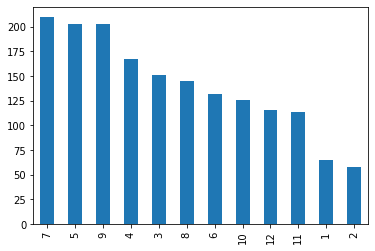

In [61]:
months.value_counts().plot(kind='bar')

<AxesSubplot:>

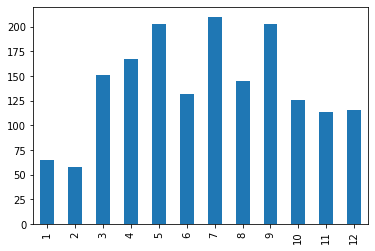

In [62]:
months.value_counts().sort_index(ascending=True).plot(kind='bar')
# the same can be done with seaborn.

#### Grouping and Aggregation
- df.groupby(['Marital_Status']).mean() gives mean of all numerical columns
- from here you can select specific columns in a list
- Eg: df.groupby(['Marital_Status']).mean()[list]
- you can put the column name after the groupby and then get statistical val
- Eg: df.groupby(['Education','Marital_Status'])['Income'].agg(['mean','median'])
- no need of agg if finding only one stat parameter. 

In [90]:
urlg = "https://raw.githubusercontent.com/sathya-explr/pandas-code-challenges-3017222/main/data/marketing_campaign.csv"

In [91]:
df = pd.read_csv(urlg,header=0,sep='\t')

In [92]:
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0


In [101]:
Amt_columns=['MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds']

In [102]:
df.groupby(['Marital_Status']).mean()[Amt_columns]

,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds
Marital_Status,,,,,
Absurd,84.500000,312.500000,205.500000,30.500000,204.000000
Alone,4.000000,26.333333,7.666667,7.000000,27.000000
Divorced,27.426724,150.206897,35.043103,26.818966,46.288793
Married,25.734954,160.681713,35.380787,26.701389,42.822917
Single,26.835417,182.108333,38.216667,27.262500,43.729167
Together,25.350000,168.103448,38.991379,26.122414,42.994828
Widow,33.090909,189.285714,51.389610,39.012987,56.766234
YOLO,3.000000,50.000000,4.000000,3.000000,42.000000


In [103]:
df.groupby(['Education','Marital_Status']).mean()['Income']

# df.groupby(['Education','Marital_Status'])['Income'].agg(['mean','median'])

Education   Marital_Status
2n Cycle    Divorced          49395.130435
            Married           46201.100000
            Single            53673.944444
            Together          44736.410714
            Widow             51392.200000
Basic       Divorced           9548.000000
            Married           21960.500000
            Single            18238.666667
            Together          21240.071429
            Widow             22123.000000
Graduation  Absurd            79244.000000
            Alone             34176.000000
            Divorced          54526.042017
            Married           50800.258741
            Single            51322.182927
            Together          55758.480702
            Widow             54976.657143
Master      Absurd            65487.000000
            Alone             61331.000000
            Divorced          50331.945946
            Married           53286.028986
            Single            53530.560000
            Together       